In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [26]:
df_15_10inst = pd.read_csv('C:/PSL_KNN/data_15_frames_10_instances.csv')
df_15_10inst['classes'] = df_15_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_15_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_15_10inst['videoname']))

temp_15_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())

['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_16' 'bien_241' 'bien_244' 'bien_278' 'bien_295' 'bien_329'
 'bien_39' 'bien_401' 'bien_561' 'bien_95' 'comer_144' 'comer_248'
 'comer_286' 'comer_303' 'comer_323' 'comer_335' 'comer_560' 'comer_625'
 'comer_712' 'comer_765' 'emoción_143' 'emoción_249' 'emoción_250'
 'emoción_272' 'emoción_281' 'emoción_286' 'emoción_43' 'emoción_54'
 'emoción_71' 'emoción_93' 'sentir_14' 'sentir_149' 'sentir_16'
 'sentir_187' 'sentir_38' 'sentir_458' 'sentir_591' 'sentir_602'
 'sentir_604' 'sentir_89' 'sí_157' 'sí_159' 'sí_194' 'sí_240' 'sí_253'
 'sí_281' 'sí_633' 'sí_76' 'sí_79' 'sí_83']


In [27]:
temp_15_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'bien_16','bien_241','bien_244','bien_278','bien_295','bien_329'
,'bien_39','bien_401','bien_561','bien_95','comer_144','comer_248'
,'comer_286','comer_303','comer_323','comer_335','comer_560','comer_625'
,'comer_712','comer_765','emoción_143','emoción_249','emoción_250'
,'emoción_272','emoción_281','emoción_286','emoción_43','emoción_54'
,'emoción_71','emoción_93','sentir_14','sentir_149','sentir_16'
,'sentir_187','sentir_38','sentir_458','sentir_591','sentir_602'
,'sentir_604','sentir_89','sí_157','sí_159','sí_194','sí_240','sí_253'
,'sí_281','sí_633','sí_76','sí_79','sí_83'],True)


temp_15_10inst['classes'] = temp_15_10inst['instance'].apply(lambda x: x.split('_')[0])


In [28]:
dataset_15_10inst = temp_15_10inst.iloc[:,1:693]
print(pd.unique(dataset_15_10inst['classes']))

['aprender' 'bien' 'comer' 'emoción' 'sentir' 'sí']


In [29]:
X_15_10inst_v2= dataset_15_10inst.iloc[:,:-1].values
y_15_10inst_v2=  dataset_15_10inst.iloc[:,-1].values


Labelencoder_Y = LabelEncoder()
y_15_10inst_v2= Labelencoder_Y.fit_transform(y_15_10inst_v2)
y_15_10inst_v2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [30]:
X_train_15_10inst_v2, X_test_15_10inst_v2, y_train_15_10inst_v2, y_test_15_10inst_v2 = train_test_split(X_15_10inst_v2, y_15_10inst_v2, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_15_10inst_v2 = scaler.fit_transform(X_train_15_10inst_v2)
X_test_15_10inst_v2 = scaler.transform(X_test_15_10inst_v2)

([<matplotlib.axis.XTick at 0x21142f98908>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

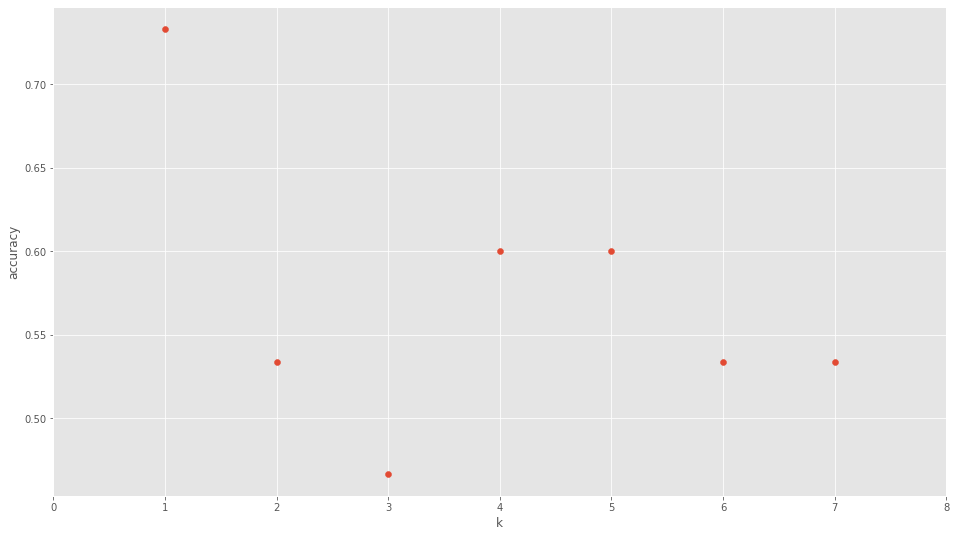

In [31]:
k_range_15_10inst_v2 = range(1, 8)
scores_15_10inst_v2 = []
for k in k_range_15_10inst_v2:
    knn_15_10inst_v2 = KNeighborsClassifier(n_neighbors = k)
    knn_15_10inst_v2.fit(X_train_15_10inst_v2, y_train_15_10inst_v2)
    scores_15_10inst_v2.append(knn_15_10inst_v2.score(X_test_15_10inst_v2, y_test_15_10inst_v2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_15_10inst_v2, scores_15_10inst_v2)
plt.xticks([0,1,2,3,4,5,6,7,8])

# Witk k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.73


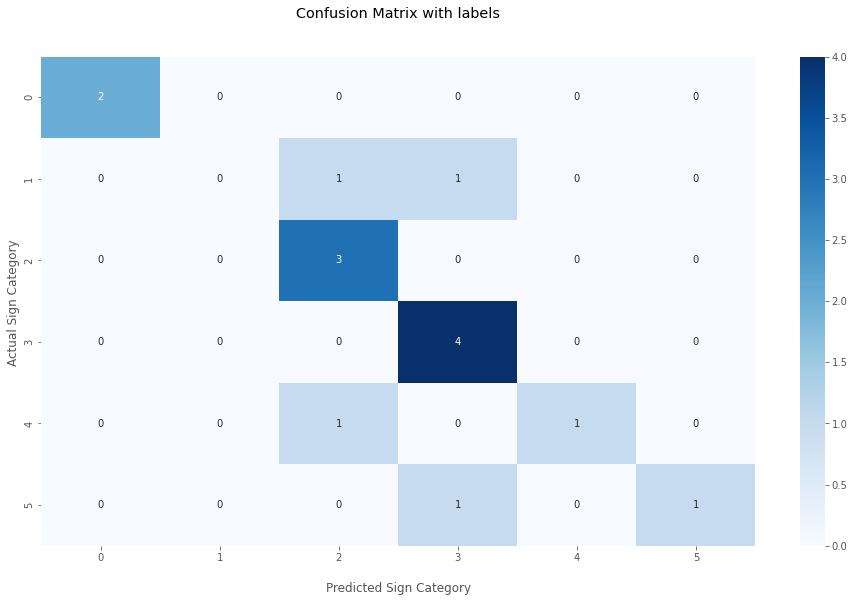

In [32]:
n_neighbors_15_10inst_v2 = 1
 
knn_15_10inst_v2 = KNeighborsClassifier(n_neighbors_15_10inst_v2)
knn_15_10inst_v2.fit(X_train_15_10inst_v2, y_train_15_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15_10inst_v2.score(X_train_15_10inst_v2, y_train_15_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15_10inst_v2.score(X_test_15_10inst_v2, y_test_15_10inst_v2)))
	 
import pandas as pd
pred_15_10inst_v2 = knn_15_10inst_v2.predict(X_test_15_10inst_v2)
cf_matrix_15_10inst_v2 = confusion_matrix(y_test_15_10inst_v2, pred_15_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_15_10inst_v2 = sns.heatmap(cf_matrix_15_10inst_v2, annot=True, cmap='Blues')

ax_15_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_15_10inst_v2.set_xlabel('\nPredicted Sign Category');
ax_15_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# Witk k = 2

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.53


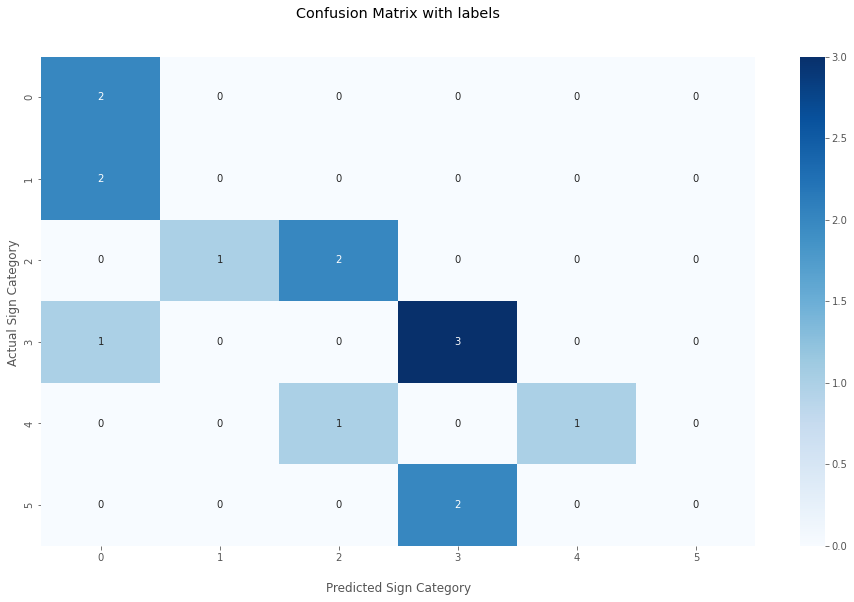

In [33]:
n_neighbors_15_10inst_v2 = 2
 
knn_15_10inst_v2 = KNeighborsClassifier(n_neighbors_15_10inst_v2)
knn_15_10inst_v2.fit(X_train_15_10inst_v2, y_train_15_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15_10inst_v2.score(X_train_15_10inst_v2, y_train_15_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15_10inst_v2.score(X_test_15_10inst_v2, y_test_15_10inst_v2)))
	 
import pandas as pd
pred_15_10inst_v2 = knn_15_10inst_v2.predict(X_test_15_10inst_v2)
cf_matrix_15_10inst_v2 = confusion_matrix(y_test_15_10inst_v2, pred_15_10inst_v2)
import seaborn as sns
import matplotlib.pyplot as plt

ax_15_10inst_v2 = sns.heatmap(cf_matrix_15_10inst_v2, annot=True, cmap='Blues')

ax_15_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_15_10inst_v2.set_xlabel('\nPredicted Sign Category');
ax_15_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# Witk k = 3

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.47


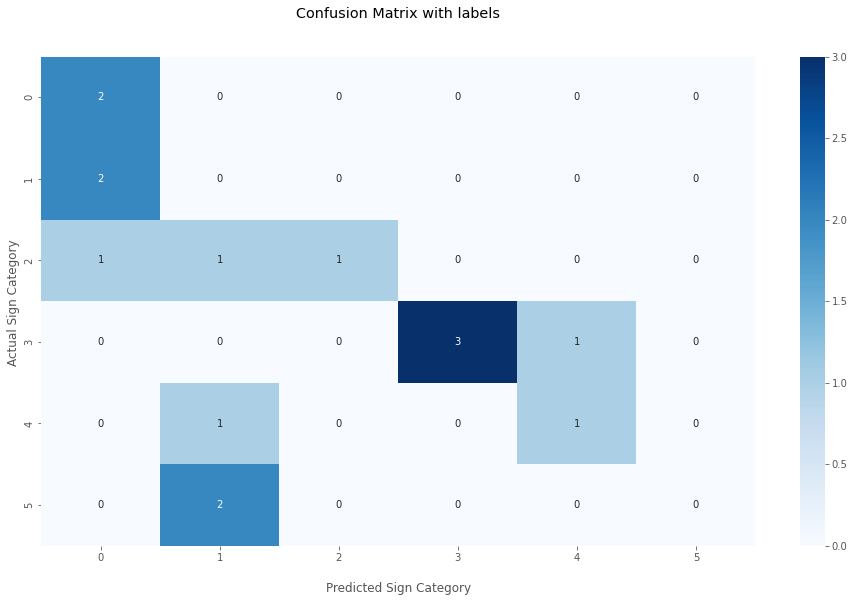

In [34]:
n_neighbors_15_10inst_v2 = 3
 
knn_15_10inst_v2 = KNeighborsClassifier(n_neighbors_15_10inst_v2)
knn_15_10inst_v2.fit(X_train_15_10inst_v2, y_train_15_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15_10inst_v2.score(X_train_15_10inst_v2, y_train_15_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15_10inst_v2.score(X_test_15_10inst_v2, y_test_15_10inst_v2)))
	 
import pandas as pd
pred_15_10inst_v2 = knn_15_10inst_v2.predict(X_test_15_10inst_v2)
cf_matrix_15_10inst_v2 = confusion_matrix(y_test_15_10inst_v2, pred_15_10inst_v2)
import seaborn as sns
import matplotlib.pyplot as plt

ax_15_10inst_v2 = sns.heatmap(cf_matrix_15_10inst_v2, annot=True, cmap='Blues')

ax_15_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_15_10inst_v2.set_xlabel('\nPredicted Sign Category');
ax_15_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# Witk k = 5

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.60


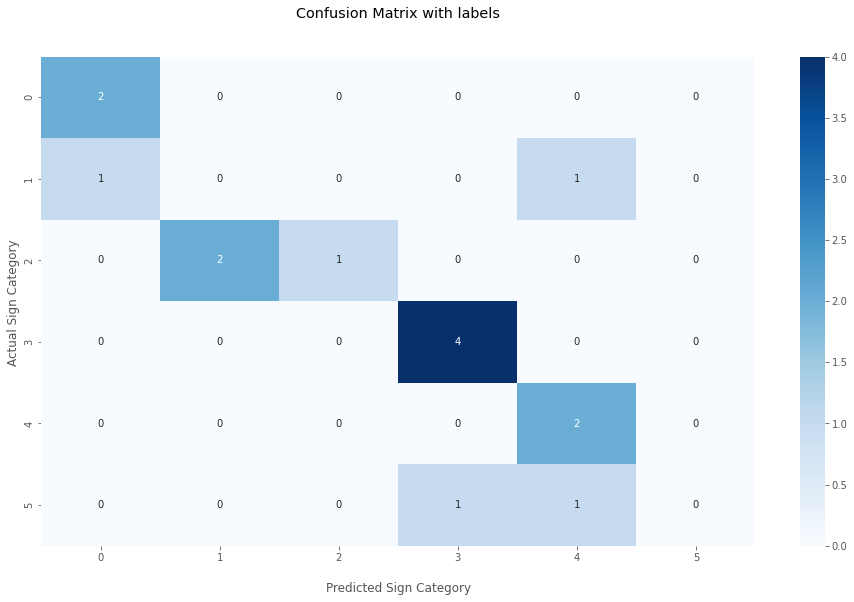

In [35]:
n_neighbors_15_10inst_v2 = 5
 
knn_15_10inst_v2 = KNeighborsClassifier(n_neighbors_15_10inst_v2)
knn_15_10inst_v2.fit(X_train_15_10inst_v2, y_train_15_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15_10inst_v2.score(X_train_15_10inst_v2, y_train_15_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15_10inst_v2.score(X_test_15_10inst_v2, y_test_15_10inst_v2)))
	 
import pandas as pd
pred_15_10inst_v2 = knn_15_10inst_v2.predict(X_test_15_10inst_v2)
cf_matrix_15_10inst_v2 = confusion_matrix(y_test_15_10inst_v2, pred_15_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_15_10inst_v2 = sns.heatmap(cf_matrix_15_10inst_v2, annot=True, cmap='Blues')

ax_15_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_15_10inst_v2.set_xlabel('\nPredicted Sign Category');
ax_15_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()